### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

### Reading the input csv file for both test and train data

In [2]:
df_test = pd.read_csv('/content/SalaryData_Test(1).csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [3]:
df_train = pd.read_csv('/content/SalaryData_Train(1).csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Checking for null values and the data types of the features

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


### Coverting the catergorical features into numerical features using label encoding for train data

In [6]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


### Coverting the catergorical features into numerical features using label encoding for test data

In [7]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


### Extracting the independent and dependent variables from the train data

In [8]:
X_train= df_train.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_train= df_train['Salary'].values
print(np.unique(Y_train))
X_train

[0 1]


array([[22,  5, 12, ...,  0, 39,  0],
       [33,  4, 12, ...,  0, 12,  0],
       [21,  2,  8, ...,  0, 39,  0],
       ...,
       [41,  2,  8, ...,  0, 39,  0],
       [ 5,  2,  8, ...,  0, 19,  0],
       [35,  3,  8, ...,  0, 39,  1]])

### Extracting the independent and dependent variables from the test data

In [9]:
X_test= df_test.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_test= df_test['Salary'].values
print(np.unique(Y_test))
X_test

[0 1]


array([[ 8,  2,  6, ...,  0, 39,  0],
       [21,  2,  8, ...,  0, 49,  0],
       [11,  1, 11, ...,  0, 39,  1],
       ...,
       [21,  2, 12, ...,  0, 49,  0],
       [27,  2, 12, ...,  0, 39,  0],
       [18,  3, 12, ...,  0, 59,  1]])

### Constructing a Linear support vector machine, at a gamma value = 0.22 and checking the accuracy score

In [10]:
svc = SVC(gamma=0.22)
svc.fit(X_train, Y_train)
score_svc = svc.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.8978087649402391


### Constructing a Radial support vector machine, and checking the accuracy score

In [11]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,Y_train)
score_svc_radical = svc_radical.score(X_test,Y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.8978087649402391


### Constructing a Support vector Machine, with the sigmoid function in the kernel

In [12]:
svc_radical_sig =svm.SVC(kernel='sigmoid',C=1,gamma=0.22)
svc_radical_sig.fit(X_train,Y_train)
score_svc_radical_sig = svc_radical_sig.score(X_test,Y_test)
print('The accuracy of sigmoid SVC Model is', score_svc_radical_sig)

The accuracy of sigmoid SVC Model is 0.7543160690571049


### Constructing a Linear support vector machine, at a gamma value = 0.33 and checking the accuracy score

In [13]:
svc_2 = SVC(gamma=0.33)
svc_2.fit(X_train, Y_train)
score_svc_2 = svc_2.score(X_test,Y_test)
print('The accuracy of SVC is', score_svc_2)

The accuracy of SVC is 0.8841965471447543


### Constructing a support vector machine, with kerenel set to polynomial and checking the accuracy score

In [14]:
svc_poly =svm.SVC(kernel='poly',C=1,gamma=0.33)
svc_poly.fit(X_train,Y_train)
score_svc_poly = svc_poly.score(X_test,Y_test)
print('The accuracy of poly SVC Model is', score_svc_poly) 

The accuracy of poly SVC Model is 1.0


### Consolidating

In [15]:
t={'model':['Lin_SVM_gamma_0.22','Radial_SVM','Sigmoid','Lin_SVM_gamma_0.33','Poly_SVM'],
  'Acc_score':[score_svc,score_svc_radical,score_svc_radical_sig,score_svc_2,score_svc_poly]
  }
t=pd.DataFrame(t)
t

,model,Acc_score
0,Lin_SVM_gamma_0.22,0.897809
1,Radial_SVM,0.897809
2,Sigmoid,0.754316
3,Lin_SVM_gamma_0.33,0.884197
4,Poly_SVM,1.000000


### Constructing a model using SVM, with Polynomial kernel to predict on teh test data, since it gives a 100% acuuracy score

In [16]:
clf = SVC(kernel='poly',C=1,gamma=0.33)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)

### Predicting the accuracy score for the test data and viewing the confusion matrix

In [17]:
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 100.0


array([[11360,     0],
       [    0,  3700]])

### Classification report

In [18]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



### Visualisation of the Y_test Vs the Y_predicted

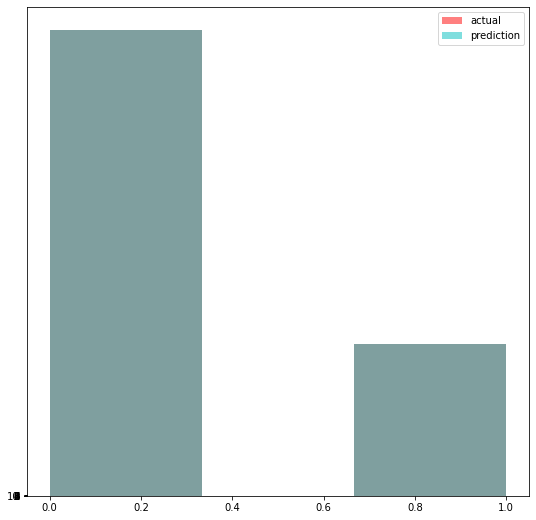

In [19]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(Y_test, color = 'r', alpha = 0.5, label = 'actual', bins=3)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=3)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

## Conclusion:

### It is evident that the Polynomial Kernel in SVM, gives better result in classifying the data, when compared to others.

### Thus, a polynomial kernal in SVM can be used to classify the salary data